In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zecon/DataDictionary.csv
/kaggle/input/zecon/City_time_series.csv
/kaggle/input/zecon/CountyCrossWalk_Zillow.csv
/kaggle/input/zecon/County_time_series.csv
/kaggle/input/zecon/Metro_time_series.csv
/kaggle/input/zecon/all_available_metrics.json
/kaggle/input/zecon/Neighborhood_time_series.csv
/kaggle/input/zecon/Zip_time_series.csv
/kaggle/input/zecon/fields_per_level.json
/kaggle/input/zecon/State_time_series.csv
/kaggle/input/zecon/cities_crosswalk.csv


## EDA

In [ ]:
crosswalk_info = pd.read_csv("/kaggle/input/zecon/CountyCrossWalk_Zillow.csv")
crosswalk_info

,CountyName,StateName,StateFIPS,CountyFIPS,MetroName_Zillow,CBSAName,CountyRegionID_Zillow,MetroRegionID_Zillow,FIPS,CBSACode
0,Pike,Pennsylvania,42,103,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",280,394913.0,42103,35620.0
1,Bronx,New York,36,5,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",401,394913.0,36005,35620.0
2,Essex,New Jersey,34,13,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",504,394913.0,34013,35620.0
3,Kings,New York,36,47,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",581,394913.0,36047,35620.0
4,Ocean,New Jersey,34,29,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",659,394913.0,34029,35620.0
...,...,...,...,...,...,...,...,...,...,...
3139,Allen,Kansas,20,1,NaN,NaN,368,NaN,20001,NaN
3140,Anson,North Carolina,37,7,NaN,NaN,374,NaN,37007,NaN
3141,Atoka,Oklahoma,40,5,NaN,NaN,375,NaN,40005,NaN
3142,Avery,North Carolina,37,11,NaN,NaN,376,NaN,37011,NaN


## State level data

In [ ]:
# state data with features for which we have at least 50% of observations
state_data = pd.read_csv("/kaggle/input/zecon/State_time_series.csv")
state_data_cleanish = state_data.loc[:,state_data.isna().sum().values / state_data.shape[0] < 0.50]
state_data_cleanish.isna().sum()

Date                                        0
RegionName                                  0
ZHVIPerSqft_AllHomes                      620
PctOfHomesDecreasingInValues_AllHomes    4292
PctOfHomesIncreasingInValues_AllHomes    4292
ZHVI_1bedroom                            2607
ZHVI_2bedroom                            1467
ZHVI_3bedroom                             425
ZHVI_4bedroom                             853
ZHVI_5BedroomOrMore                      1398
ZHVI_AllHomes                             774
ZHVI_BottomTier                           896
ZHVI_CondoCoop                           1530
ZHVI_MiddleTier                           774
ZHVI_SingleFamilyResidence                774
ZHVI_TopTier                              688
dtype: int64

In [ ]:
#state_data_cleanish.groupby("RegionName").count()

# states with missing dates: Alaska (244), DistrictofColumbia (233), Montana (240), NorthDakota (159), UnitedStates (95), Wyoming (237)
idxs = state_data_cleanish.groupby("RegionName").filter(lambda x: x['Date'].count() >= 260)['RegionName']
state_data_cleanish = state_data_cleanish.loc[state_data_cleanish['RegionName'].isin(idxs)]
state_data_cleanish.groupby("RegionName").count()

,Date,ZHVIPerSqft_AllHomes,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier
RegionName,,,,,,,,,,,,,,,
Alabama,261,261,251,251,261,261,261,261,261,261,261,261,261,261,261
Arizona,261,261,251,251,261,261,261,261,261,261,261,261,261,261,261
Arkansas,261,261,251,251,261,261,261,261,261,261,261,261,261,261,261
California,261,261,251,251,261,261,261,261,261,261,261,261,261,261,261
Colorado,261,261,251,251,261,261,261,261,261,261,261,261,261,261,261
Connecticut,261,261,251,251,261,261,261,261,261,261,261,261,261,261,261
Delaware,261,261,251,251,261,261,261,261,261,261,261,0,261,261,261
Florida,261,261,251,251,261,261,261,261,261,261,261,261,261,261,261
Georgia,261,261,251,251,261,261,261,261,261,261,261,261,261,261,261


In [ ]:
state_data_cleanish.shape, state_data_cleanish.isnull().mean()

((12004, 16),
 Date                                     0.000000
 RegionName                               0.000000
 ZHVIPerSqft_AllHomes                     0.042069
 PctOfHomesDecreasingInValues_AllHomes    0.276325
 PctOfHomesIncreasingInValues_AllHomes    0.276325
 ZHVI_1bedroom                            0.174608
 ZHVI_2bedroom                            0.099300
 ZHVI_3bedroom                            0.006664
 ZHVI_4bedroom                            0.061480
 ZHVI_5BedroomOrMore                      0.089220
 ZHVI_AllHomes                            0.054898
 ZHVI_BottomTier                          0.065062
 ZHVI_CondoCoop                           0.117877
 ZHVI_MiddleTier                          0.054898
 ZHVI_SingleFamilyResidence               0.054898
 ZHVI_TopTier                             0.033239
 dtype: float64)

In [ ]:
crosswalk_info['StateName'].unique()

array(['Pennsylvania', 'New York', 'New Jersey', 'California', 'Indiana',
       'Illinois', 'Wisconsin', 'Texas', 'Delaware', 'Maryland',
       'West Virginia', 'Virginia', 'District of Columbia', 'Florida',
       'Georgia', 'Massachusetts', 'New Hampshire', 'Michigan', 'Arizona',
       'Washington', 'Minnesota', 'Missouri', 'Colorado', 'Oregon',
       'South Carolina', 'North Carolina', 'Kentucky', 'Ohio', 'Kansas',
       'Nevada', 'Tennessee', 'Rhode Island', 'Arkansas', 'Mississippi',
       'Oklahoma', 'Connecticut', 'Louisiana', 'Alabama', 'Utah',
       'Hawaii', 'New Mexico', 'Nebraska', 'Iowa', 'Idaho', 'Maine',
       'Alaska', 'South Dakota', 'Vermont', 'North Dakota', 'Montana',
       'Wyoming'], dtype=object)

In [ ]:
crosswalk_info = crosswalk_info.drop_duplicates(subset='StateName')

# Remove whitespaces and convert to lower case
state_data_cleanish['RegionName'] = state_data_cleanish['RegionName'].str.replace(' ', '').str.lower()
crosswalk_info.loc[:,'StateName'] = crosswalk_info['StateName'].str.replace(' ', '').str.lower()

# Now perform the merge
state_fips_data = pd.merge(state_data_cleanish, crosswalk_info[["StateName", "StateFIPS", "CountyRegionID_Zillow"]],
                     how='left', left_on='RegionName', right_on='StateName').drop(["PctOfHomesDecreasingInValues_AllHomes", "PctOfHomesIncreasingInValues_AllHomes"], axis=1)
state_fips_data.head()

,Date,RegionName,ZHVIPerSqft_AllHomes,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,StateName,StateFIPS,CountyRegionID_Zillow
0,1996-04-30,alabama,50.0,61500.0,48900.0,78200.0,146500.0,206300.0,79500.0,45600.0,99500.0,79500.0,79000.0,140200.0,alabama,1,1614
1,1996-04-30,arizona,62.0,59200.0,86400.0,96100.0,128400.0,190500.0,103600.0,67100.0,78900.0,103600.0,107500.0,168700.0,arizona,4,2402
2,1996-04-30,arkansas,42.0,53000.0,54500.0,76800.0,135100.0,186000.0,64400.0,38400.0,70300.0,64400.0,64500.0,115200.0,arkansas,5,2907
3,1996-04-30,california,102.0,93700.0,123400.0,150900.0,196100.0,265300.0,157900.0,95100.0,136100.0,157900.0,162000.0,270600.0,california,6,3101
4,1996-04-30,colorado,82.0,77800.0,97500.0,129000.0,176100.0,212900.0,128100.0,82700.0,99400.0,128100.0,133600.0,209300.0,colorado,8,1670


In [ ]:
# "RegionName", "StateName", "CountyRegionID_Zillow" are useful for merging other datasets but useless for training given we have unique id StateFIPS
# so additional variables should be added prior to running this cell
training_data = state_fips_data.sort_values(by=['Date', 'StateFIPS']).drop(["RegionName", "StateName", "CountyRegionID_Zillow"], axis=1)

training_data['Date'] = pd.to_datetime(training_data['Date'])

training_data.isnull().sum()

Date                             0
ZHVIPerSqft_AllHomes           505
ZHVI_1bedroom                 2096
ZHVI_2bedroom                 1192
ZHVI_3bedroom                   80
ZHVI_4bedroom                  738
ZHVI_5BedroomOrMore           1071
ZHVI_AllHomes                  659
ZHVI_BottomTier                781
ZHVI_CondoCoop                1415
ZHVI_MiddleTier                659
ZHVI_SingleFamilyResidence     659
ZHVI_TopTier                   399
StateFIPS                        0
dtype: int64

In [ ]:
# 1996 - 2017
training_data['Date'].head(1), training_data['Date'].tail(1)

(0   1996-04-30
 Name: Date, dtype: datetime64[ns],
 12003   2017-12-31
 Name: Date, dtype: datetime64[ns])

Group-based imputation to respect strata -> https://www.kdnuggets.com/2017/09/python-data-preparation-case-files-group-based-imputation.html

## Data preprocessing

- Imputation: Group based imputation to respect structure of panel dataset
- Standardization: Standard scaling for neural network training dataset
- Encoding:

In [ ]:
# numeric features
# main concerns are multicollinearity ...
state_data_numeric = training_data.select_dtypes(include=['float64'])

<Axes: >

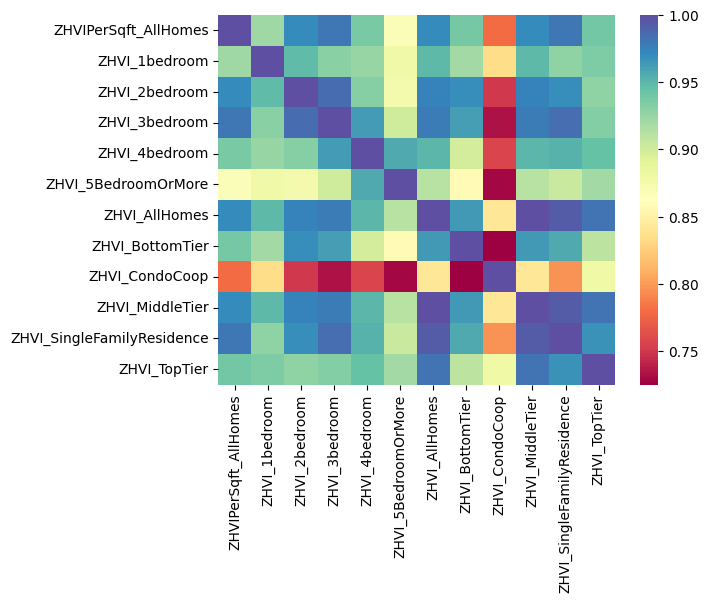

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(state_data_numeric.corr(), cmap="Spectral")

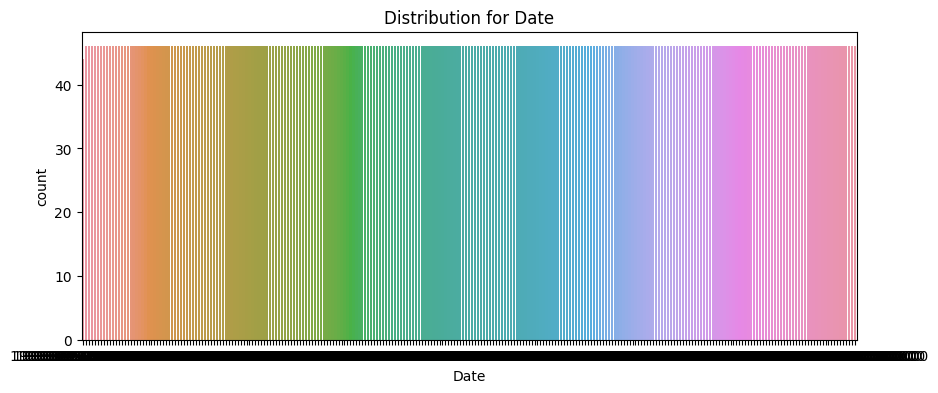

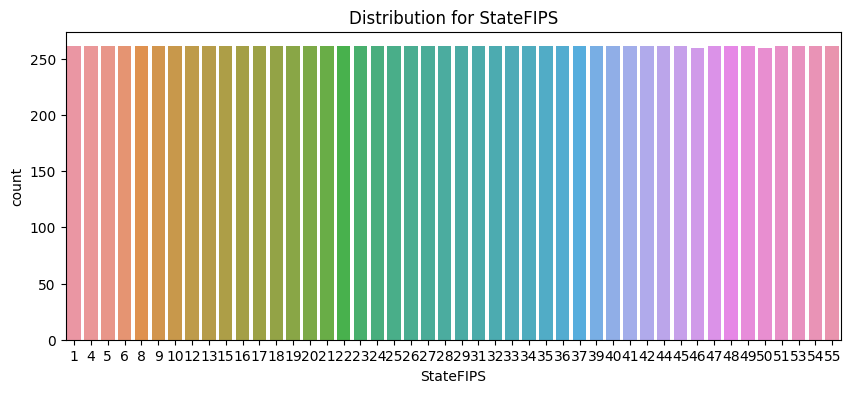

In [ ]:
# categorical features
## main concern is balance
state_data_categorical = training_data.select_dtypes(exclude=['float64'])
for column in state_data_categorical:
    plt.figure(figsize=(10,4))
    sns.countplot(x=column, data=state_data_categorical)
    plt.title('Distribution for {}'.format(column))
    plt.show()

**Advantages of Group Based Imputation**

1. Maintains subgroup characteristics: It helps in retaining the statistical properties within each group, making the imputation more realistic and tailored.
2. Reduces bias: By using subgroup metrics for imputation, it avoids the bias that can occur when using overall metrics.
3. Improves accuracy: For heterogeneous data, group-based imputation can improve the accuracy of imputation by using more relevant baseline values.

In [ ]:
# List of columns to be imputed
columns_to_impute = training_data.columns.drop(['Date', 'StateFIPS'])

# Apply the process to all columns
for column in columns_to_impute:
    training_data[column] = training_data.groupby('StateFIPS')[column].transform(lambda x: x.fillna(x.mean()))
    training_data[column] = training_data[column].round(2)

# some states seem to have all null values for some features or may not have enough data,
# these wouldn't get updated
training_data.isnull().sum()

Date                             0
ZHVIPerSqft_AllHomes           261
ZHVI_1bedroom                 1566
ZHVI_2bedroom                 1044
ZHVI_3bedroom                    0
ZHVI_4bedroom                  522
ZHVI_5BedroomOrMore            783
ZHVI_AllHomes                  261
ZHVI_BottomTier                521
ZHVI_CondoCoop                1305
ZHVI_MiddleTier                261
ZHVI_SingleFamilyResidence     261
ZHVI_TopTier                   261
StateFIPS                        0
dtype: int64

In [ ]:
# fill the reamining NANs with the global mean
for col in columns_to_impute:
    # Check if there are still missing values after group-wise imputation
    if training_data[col].isnull().any():
        # Apply a global mean or median imputation as a fallback
        global_mean = training_data[col].mean()
        training_data[col] = training_data[col].fillna(global_mean)
        training_data[col] = training_data[col].round(2)

training_data.isnull().sum()

Date                          0
ZHVIPerSqft_AllHomes          0
ZHVI_1bedroom                 0
ZHVI_2bedroom                 0
ZHVI_3bedroom                 0
ZHVI_4bedroom                 0
ZHVI_5BedroomOrMore           0
ZHVI_AllHomes                 0
ZHVI_BottomTier               0
ZHVI_CondoCoop                0
ZHVI_MiddleTier               0
ZHVI_SingleFamilyResidence    0
ZHVI_TopTier                  0
StateFIPS                     0
dtype: int64

In [ ]:
from IPython.display import HTML

def create_download_link(title = "Download CSV file", filename = "data.csv"):
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

# create a link to download the dataframe which was saved with .to_csv method
training_data.to_csv("State_FIPS_data.csv")
create_download_link(filename='State_FIPS_data.csv')

### Scaling and Stardardization

Since tree models don't benefit from data transformations, I will work on a copy of the dataset meant to train the neural network.

In [ ]:
from sklearn.preprocessing import StandardScaler

grouped = training_data.groupby('StateFIPS')

# Applying StandardScaler within each group
scaled_features = pd.DataFrame()  # Empty DataFrame to store scaled features
feature_columns = training_data.drop(['Date', 'StateFIPS'], axis=1).columns

for name, group in grouped:
    scaler = StandardScaler()
    scaled_group = scaler.fit_transform(group[feature_columns])
    scaled_group = pd.DataFrame(scaled_group, columns=feature_columns, index=group.index)
    scaled_features = pd.concat([scaled_features, scaled_group])

nn_training_data = training_data.drop(columns=feature_columns).join(scaled_features)
nn_training_data.head()

,Date,StateFIPS,ZHVIPerSqft_AllHomes,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier
0,1996-04-30,1,-1.768013,-1.565204,-1.955503,-2.002246,-1.951488,-1.851074,-1.876590,-1.546811,-1.741121,-1.876590,-1.869018,-1.781614
1,1996-04-30,4,-1.460831,-1.286640,-1.466429,-1.447063,-1.489534,-1.547257,-1.446964,-1.296832,-1.331362,-1.446964,-1.457926,-1.613595
2,1996-04-30,5,-1.708528,-1.923031,-1.904331,-1.853083,-1.760701,-2.130150,-1.707269,-1.666431,-1.991305,-1.707269,-1.695306,-1.759592
3,1996-04-30,6,-1.618110,-1.575008,-1.586123,-1.590005,-1.681274,-1.756584,-1.628067,-1.359673,-1.687341,-1.628067,-1.616641,-1.841681
4,1996-04-30,8,-1.830380,-1.735943,-1.761501,-1.745656,-1.847353,-1.906292,-1.764477,-1.874620,-1.701246,-1.764477,-1.758541,-1.891466


## Feature engineering

This project focuses on comparing performance of selected models between two cross validation training methods. Complex feature engineering complicates the interpretation of the models' predictions and thus I choose to only add date features. Future work could focus on extending the Zillow housing dataset to include economic variables, government statistics, and additional feature engineering.


In [ ]:
training_data['Year'] = training_data['Date'].dt.year
training_data['Month'] = training_data['Date'].dt.month
training_data['Day'] = training_data['Date'].dt.day

In [ ]:
nn_training_data['Year'] = nn_training_data['Date'].dt.year
nn_training_data['Month'] = nn_training_data['Date'].dt.month
nn_training_data['Day'] = nn_training_data['Date'].dt.day

## Split data

I am dealing with a panel dataset, so I need split the data while taking the temporal unit into account to ensure disjoint and sequential sets.

In [ ]:
# features and target for neural network
X_nn = nn_training_data.drop(columns=['ZHVIPerSqft_AllHomes'])  # drop target
y_nn = nn_training_data['ZHVIPerSqft_AllHomes']
groups_nn = nn_training_data['StateFIPS']

(X_nn.shape, X_nn.head()), (y_nn.shape, y_nn.head())

(((12004, 16),
          Date  StateFIPS  ZHVI_1bedroom  ZHVI_2bedroom  ZHVI_3bedroom  \
  0 1996-04-30          1      -1.565204      -1.955503      -2.002246   
  1 1996-04-30          4      -1.286640      -1.466429      -1.447063   
  2 1996-04-30          5      -1.923031      -1.904331      -1.853083   
  3 1996-04-30          6      -1.575008      -1.586123      -1.590005   
  4 1996-04-30          8      -1.735943      -1.761501      -1.745656   
  
     ZHVI_4bedroom  ZHVI_5BedroomOrMore  ZHVI_AllHomes  ZHVI_BottomTier  \
  0      -1.951488            -1.851074      -1.876590        -1.546811   
  1      -1.489534            -1.547257      -1.446964        -1.296832   
  2      -1.760701            -2.130150      -1.707269        -1.666431   
  3      -1.681274            -1.756584      -1.628067        -1.359673   
  4      -1.847353            -1.906292      -1.764477        -1.874620   
  
     ZHVI_CondoCoop  ZHVI_MiddleTier  ZHVI_SingleFamilyResidence  ZHVI_TopTier  \
  0

In [ ]:
# Separate features X and target y
X = training_data.drop(columns=['ZHVIPerSqft_AllHomes'])  # drop target
y = training_data['ZHVIPerSqft_AllHomes']
groups = training_data['StateFIPS']

(X.shape, X.head()), (y.shape, y.head())

(((12004, 16),
          Date  ZHVI_1bedroom  ZHVI_2bedroom  ZHVI_3bedroom  ZHVI_4bedroom  \
  0 1996-04-30        61500.0        48900.0        78200.0       146500.0   
  1 1996-04-30        59200.0        86400.0        96100.0       128400.0   
  2 1996-04-30        53000.0        54500.0        76800.0       135100.0   
  3 1996-04-30        93700.0       123400.0       150900.0       196100.0   
  4 1996-04-30        77800.0        97500.0       129000.0       176100.0   
  
     ZHVI_5BedroomOrMore  ZHVI_AllHomes  ZHVI_BottomTier  ZHVI_CondoCoop  \
  0             206300.0        79500.0          45600.0         99500.0   
  1             190500.0       103600.0          67100.0         78900.0   
  2             186000.0        64400.0          38400.0         70300.0   
  3             265300.0       157900.0          95100.0        136100.0   
  4             212900.0       128100.0          82700.0         99400.0   
  
     ZHVI_MiddleTier  ZHVI_SingleFamilyResidence  ZHVI_

In [ ]:
# create a link to download the dataframe which was saved with .to_csv method
training_data.to_csv("ML_training_data.csv")
create_download_link(filename='ML_training_data.csv')


In [ ]:
# create a link to download the dataframe which was saved with .to_csv method
nn_training_data.to_csv("NN_training_data.csv")
create_download_link(filename='NN_training_data.csv')

https://www.kaggle.com/code/jorijnsmit/found-the-holy-grail-grouptimeseriessplit

In [ ]:
from sklearn.model_selection._split import _BaseKFold, indexable, _num_samples
from sklearn.utils.validation import _deprecate_positional_args

# https://github.com/getgaurav2/scikit-learn/blob/d4a3af5cc9da3a76f0266932644b884c99724c57/sklearn/model_selection/_split.py#L2243
class GroupTimeSeriesSplit(_BaseKFold):
    """Time Series cross-validator variant with non-overlapping groups.
    Provides train/test indices to split time series data samples
    that are observed at fixed time intervals according to a
    third-party provided group.
    In each split, test indices must be higher than before, and thus shuffling
    in cross validator is inappropriate.
    This cross-validation object is a variation of :class:`KFold`.
    In the kth split, it returns first k folds as train set and the
    (k+1)th fold as test set.
    The same group will not appear in two different folds (the number of
    distinct groups has to be at least equal to the number of folds).
    Note that unlike standard cross-validation methods, successive
    training sets are supersets of those that come before them.
    Read more in the :ref:`User Guide <cross_validation>`.
    Parameters
    ----------
    n_splits : int, default=5
        Number of splits. Must be at least 2.
    max_train_size : int, default=None
        Maximum size for a single training set.
    Examples
    --------
    >>> import numpy as np
    >>> from sklearn.model_selection import GroupTimeSeriesSplit
    >>> groups = np.array(['a', 'a', 'a', 'a', 'a', 'a',\
                           'b', 'b', 'b', 'b', 'b',\
                           'c', 'c', 'c', 'c',\
                           'd', 'd', 'd'])
    >>> gtss = GroupTimeSeriesSplit(n_splits=3)
    >>> for train_idx, test_idx in gtss.split(groups, groups=groups):
    ...     print("TRAIN:", train_idx, "TEST:", test_idx)
    ...     print("TRAIN GROUP:", groups[train_idx],\
                  "TEST GROUP:", groups[test_idx])
    TRAIN: [0, 1, 2, 3, 4, 5] TEST: [6, 7, 8, 9, 10]
    TRAIN GROUP: ['a' 'a' 'a' 'a' 'a' 'a']\
    TEST GROUP: ['b' 'b' 'b' 'b' 'b']
    TRAIN: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] TEST: [11, 12, 13, 14]
    TRAIN GROUP: ['a' 'a' 'a' 'a' 'a' 'a' 'b' 'b' 'b' 'b' 'b']\
    TEST GROUP: ['c' 'c' 'c' 'c']
    TRAIN: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]\
    TEST: [15, 16, 17]
    TRAIN GROUP: ['a' 'a' 'a' 'a' 'a' 'a' 'b' 'b' 'b' 'b' 'b' 'c' 'c' 'c' 'c']\
    TEST GROUP: ['d' 'd' 'd']
    """
    @_deprecate_positional_args
    def __init__(self,
                 n_splits=5,
                 *,
                 max_train_size=None
                 ):
        super().__init__(n_splits, shuffle=False, random_state=None)
        self.max_train_size = max_train_size

    def split(self, X, y=None, groups=None):
        """Generate indices to split data into training and test set.
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data, where n_samples is the number of samples
            and n_features is the number of features.
        y : array-like of shape (n_samples,)
            Always ignored, exists for compatibility.
        groups : array-like of shape (n_samples,)
            Group labels for the samples used while splitting the dataset into
            train/test set.
        Yields
        ------
        train : ndarray
            The training set indices for that split.
        test : ndarray
            The testing set indices for that split.
        """
        if groups is None:
            raise ValueError(
                "The 'groups' parameter should not be None")
        X, y, groups = indexable(X, y, groups)
        n_samples = _num_samples(X)
        n_splits = self.n_splits
        n_folds = n_splits + 1
        group_dict = {}
        u, ind = np.unique(groups, return_index=True)
        unique_groups = u[np.argsort(ind)]
        n_samples = _num_samples(X)
        n_groups = _num_samples(unique_groups)
        for idx in np.arange(n_samples):
            if (groups[idx] in group_dict):
                group_dict[groups[idx]].append(idx)
            else:
                group_dict[groups[idx]] = [idx]
        if n_folds > n_groups:
            raise ValueError(
                ("Cannot have number of folds={0} greater than"
                 " the number of groups={1}").format(n_folds,
                                                     n_groups))
        group_test_size = n_groups // n_folds
        group_test_starts = range(n_groups - n_splits * group_test_size,
                                  n_groups, group_test_size)
        for group_test_start in group_test_starts:
            train_array = []
            test_array = []
            for train_group_idx in unique_groups[:group_test_start]:
                train_array_tmp = group_dict[train_group_idx]
                train_array = np.sort(np.unique(
                                      np.concatenate((train_array,
                                                      train_array_tmp)),
                                      axis=None), axis=None)
            train_end = train_array.size
            if self.max_train_size and self.max_train_size < train_end:
                train_array = train_array[train_end -
                                          self.max_train_size:train_end]
            for test_group_idx in unique_groups[group_test_start:
                                                group_test_start +
                                                group_test_size]:
                test_array_tmp = group_dict[test_group_idx]
                test_array = np.sort(np.unique(
                                              np.concatenate((test_array,
                                                              test_array_tmp)),
                                     axis=None), axis=None)
            yield [int(i) for i in train_array], [int(i) for i in test_array]

In [ ]:
panel_grouped_cv = GroupTimeSeriesSplit(n_splits=2)

X_array = X.drop(["Date", "StateFIPS"], axis=1).to_numpy()
y_array = y.to_numpy()
groups = X['StateFIPS'].values

In [ ]:
X_array.shape, y_array.shape, groups.shape

((12004, 14), (12004,), (12004,))

## Cross-Validation (Panel split)

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [ ]:
# double check panel is balanced
state_counts = X['StateFIPS'].value_counts()
state_counts

StateFIPS
1     261
4     261
5     261
6     261
8     261
9     261
10    261
12    261
13    261
15    261
16    261
17    261
18    261
19    261
20    261
21    261
22    261
23    261
24    261
25    261
26    261
27    261
28    261
29    261
31    261
32    261
33    261
34    261
35    261
36    261
37    261
39    261
40    261
41    261
42    261
44    261
45    261
47    261
48    261
49    261
51    261
53    261
54    261
55    261
46    260
50    260
Name: count, dtype: int64

In [ ]:
    import xgboost as xgb

    from sklearn.model_selection import  GridSearchCV
    from sklearn.metrics import mean_squared_error

    # Assuming you have a model already defined, e.g., an XGBRegressor
    model = xgb.XGBRegressor(max_depth=3)

    state_scores = {state: [] for state in X['StateFIPS'].unique()}

    i=1
    for train_idx, test_idx in GroupTimeSeriesSplit(n_splits=3).split(X, y, groups=X['StateFIPS']):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        state_fips_test = X['StateFIPS'].iloc[test_idx]  # State identifiers for the test set

        print(f"\nSplit {i}")
        print(f"X train: {X_train.shape},\t X test: {X_test.shape},\nY train: {y_train.shape},\t Y test: {y_test.shape}")
        print("States in test set:", state_fips_test.unique())

        model.fit(X_train.drop(['Date', 'StateFIPS'], axis=1), y_train)
        y_pred = model.predict(X_test.drop(['Date', 'StateFIPS'], axis=1))

        for state in X['StateFIPS'].unique():
            state_mask = (state_fips_test == state)
            if np.any(state_mask):
                mse = mean_squared_error(y_test[state_mask], y_pred[state_mask])
                state_scores[state].append(mse)
        i += 1

    # Average MSE for each state, handling empty cases
    average_state_scores = {state: np.mean(scores) if scores else "Not in test set" for state, scores in state_scores.items()}
    average_state_scores


Split 1
X train: (3393, 16),	 X test: (2871, 16),
Y train: (3393,),	 Y test: (2871,)
States in test set: [19 20 21 22 23 24 25 26 27 28 29]

Split 2
X train: (6264, 16),	 X test: (2871, 16),
Y train: (6264,),	 Y test: (2871,)
States in test set: [31 32 33 34 35 36 37 39 40 41 42]

Split 3
X train: (9135, 16),	 X test: (2869, 16),
Y train: (9135,),	 Y test: (2869,)
States in test set: [44 45 47 48 49 51 53 54 55 46 50]


{1: 'Not in test set',
 4: 'Not in test set',
 5: 'Not in test set',
 6: 'Not in test set',
 8: 'Not in test set',
 9: 'Not in test set',
 10: 'Not in test set',
 12: 'Not in test set',
 13: 'Not in test set',
 15: 'Not in test set',
 16: 'Not in test set',
 17: 'Not in test set',
 18: 'Not in test set',
 19: 282.0190794099779,
 20: 860.3437419333712,
 21: 24.34654131866086,
 22: 274.0694414828962,
 23: 79.87793819594054,
 24: 40.890542118501905,
 25: 34.65244758746076,
 26: 140.1825381051135,
 27: 604.1615150406253,
 28: 321.88782960189894,
 29: 56.84400937703823,
 31: 11.191162863274045,
 32: 46.12008671787562,
 33: 300.99564854699315,
 34: 93.61342100232373,
 35: 58.33033359620963,
 36: 1230.0069357662642,
 37: 124.4431730076327,
 39: 7.503704068962158,
 40: 40.44194575035993,
 41: 43.93331129124216,
 42: 66.9422509670165,
 44: 188.86577748249073,
 45: 131.633632572651,
 47: 17.192259592431423,
 48: 60.11291705858643,
 49: 528.9089602538307,
 51: 232.33989022186086,
 53: 148.7486398

**Benefits of Panel Split**

Avoiding Data Leakage:

- The group-based splitting ensures that the same group (state) does not appear in both the training and test sets, which is important when you want to evaluate a model’s ability to generalize to new groups.
- This approach also respects the temporal aspect of the data, ensuring that future data is not used to train the model for past predictions.

Respecting Temporal Integrity:

- Ensuring that the test set contains only later time periods compared to the training set mirrors real-world forecasting scenarios, where you want to predict future outcomes based on past data.

**Trade-offs and Challenges**

Curse of Dimensionality:

- The curse of dimensionality refers to the phenomenon where the feature space becomes increasingly sparse as the number of features grows, leading to challenges in model training.
- In panel data settings, splitting by group and time can result in small and potentially non-representative training and test sets if the number of groups or the amount of data per group is limited.

Limited Data in Each Set:

- With many groups and time periods, each split might end up with relatively small subsets of data for training and testing, which can reduce the robustness and reliability of the cross-validation results.
- Small datasets can lead to unstable model training and evaluation, as the performance might vary significantly with small changes in the data.

The panel split is promising, and much more realistic for making statistical inference afterwards, but we face clear obstacles given the size of the state-level data. Future work should consider larger datasets to evaluate this cross validation generator.

For now, given this limitations. I will evaluate Linear Regression, XGBoost, and a Decision Tree with the custom CV generator and Sklearn's default generator to compare performance scores.

In [ ]:
def fit_gridsearchCV(X, y, groups,
                     estimator, cv_generator,
                     param_grid, scoring):

    gsearch = GridSearchCV(estimator=estimator,
                       cv=cv_generator,
                       param_grid=param_grid,
                       scoring=scoring)

    gsearch.fit(X, y, groups=groups)

    print("Best Parameters:", gsearch.best_params_)
    print("Best MSE:", -gsearch.best_score_)

    return gsearch.best_estimator_, gsearch.best_score_

In [ ]:
from sklearn.model_selection import LearningCurveDisplay

def plot_learningCurve(X, y, groups,
                       tuned_model, cv_generator):

    fig, ax = plt.subplots(figsize=(6, 6))

    common_params = {
        "X": X,  # features array
        "y": y,  # target array
        "groups": groups,  # group identifier array
        "cv": cv_generator,
        "score_type": "both",
        "n_jobs": 4,
        "line_kw": {"marker": "o"},
        "std_display_style": "fill_between",
        "score_name": "MSE",
    }


    LearningCurveDisplay.from_estimator(tuned_model, **common_params, ax=ax)

    ax.legend(["Training Score", "Test Score"])
    ax.set_title(f"Learning Curve for {type(tuned_model).__name__}")

Best Parameters: {}
Best MSE: 226.89613280381243


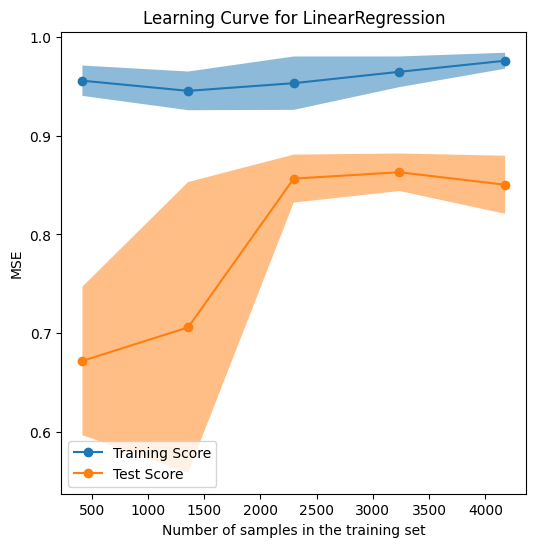

In [ ]:
from sklearn.linear_model import LinearRegression

base_lr_model = LinearRegression()
param_search = {}

# custom panel cv split
fit_lr_panel, _ = fit_gridsearchCV(X_array, y_array, groups,
                                   base_lr_model, panel_grouped_cv,
                                   param_search, "neg_mean_squared_error")

# no hyperparameter tuning for Linear Regression so we use the base model again
plot_learningCurve(X_array, y_array, groups,
                  fit_lr_panel, panel_grouped_cv)

Best Parameters: {}
Best MSE: 103.5357758689048


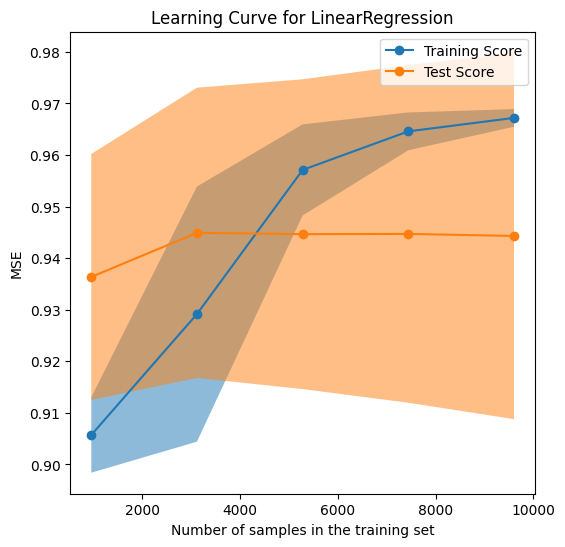

In [ ]:
base_lr_model = LinearRegression()
param_search = {}

# sklearn cv split
fit_lr, _ = fit_gridsearchCV(X_array, y_array, groups,
                             base_lr_model, 5,
                             param_search, "neg_mean_squared_error")

# no hyperparameter tuning for Linear Regression so we use the base model again
plot_learningCurve(X_array, y_array, groups,
                  fit_lr, 5)

Best Parameters: {'max_depth': 5, 'n_estimators': 10}
Best MSE: 124.31297626534753


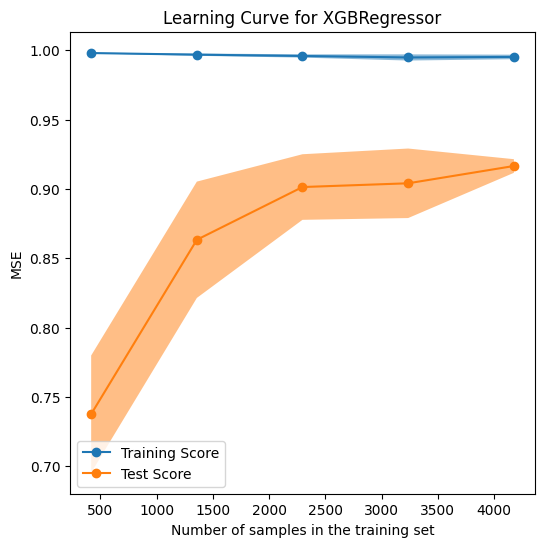

In [ ]:
base_xgb_model = xgb.XGBRegressor()
param_search = {'n_estimators' : [10, 20, 30],
                'max_depth' : [3, 5, 7]}

# custom panel cv split
tuned_panel_xgb_model, best_score = fit_gridsearchCV(X_array, y_array, groups,
                                           base_xgb_model, panel_grouped_cv,
                                           param_search, "neg_mean_squared_error")

plot_learningCurve(X_array, y_array, groups,
                  tuned_panel_xgb_model, panel_grouped_cv)

Best Parameters: {'max_depth': 7, 'n_estimators': 50}
Best MSE: 74.33233352646374


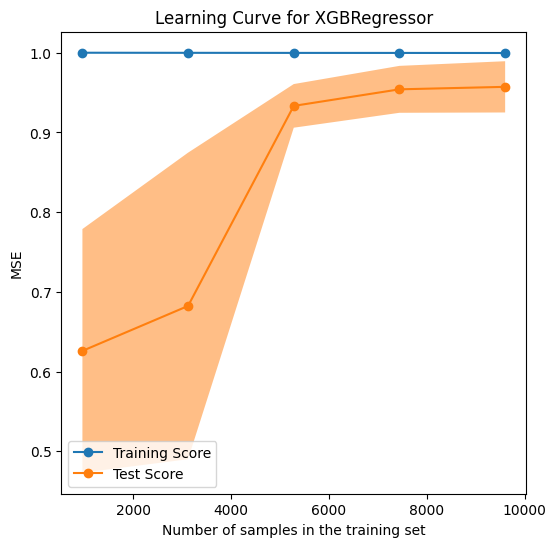

In [ ]:
base_xgb_model = xgb.XGBRegressor()
param_search = {'n_estimators' : [10, 20, 30, 50],
                'max_depth' : [3, 5, 7]}

# sklearn cv split
tuned_xgb_model, best_score = fit_gridsearchCV(X_array, y_array, groups,
                                           base_xgb_model, 5,
                                           param_search, "neg_mean_squared_error")

plot_learningCurve(X_array, y_array, groups,
                  tuned_xgb_model, 5)

Best Parameters: {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best MSE: 172.87880603797743


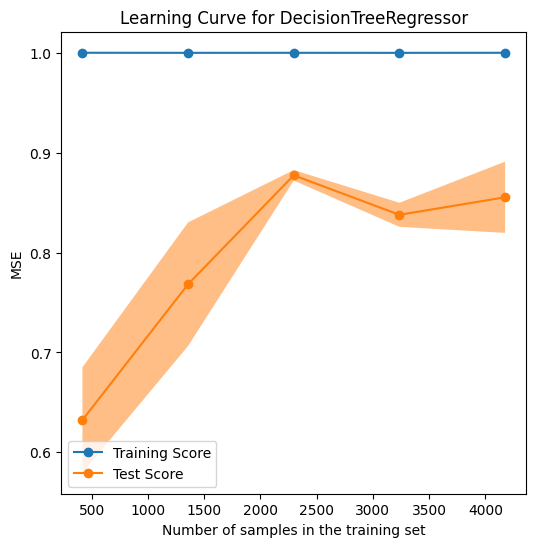

In [ ]:
from sklearn.tree import DecisionTreeRegressor

base_dtree_model = DecisionTreeRegressor(random_state=42)
param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_leaf_nodes': [None, 10, 20]
}

# custom panel cv split
tuned_panel_dtree_model, best_score = fit_gridsearchCV(X_array, y_array, groups,
                                           base_dtree_model, panel_grouped_cv,
                                           param_dist, "neg_mean_squared_error")

plot_learningCurve(X_array, y_array, groups,
                  tuned_panel_dtree_model, panel_grouped_cv)

Best Parameters: {'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best MSE: 89.00087128258272


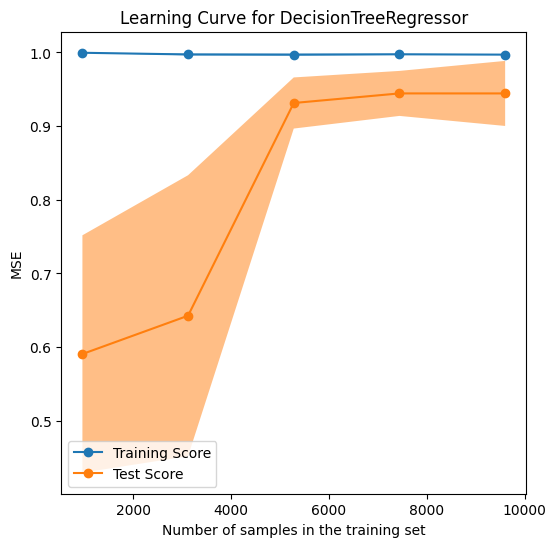

In [ ]:
base_dtree_model = DecisionTreeRegressor(random_state=42)
param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_leaf_nodes': [None, 10, 20]
}

# sklearn cv split
tuned_dtree_model, best_score = fit_gridsearchCV(X_array, y_array, groups,
                                           base_dtree_model, 5,
                                           param_dist, "neg_mean_squared_error")

plot_learningCurve(X_array, y_array, groups,
                  tuned_dtree_model, 5)

## Cross Validation (Temporal split)

I wondered if I would get better performance score by ignoring the state level

## Neural Network

I wonder if it makes sense to apply the panel split to neural networks. These are inherently hard to interpret, as we can see from the results below the fit is much more accurate for prediction than any other model. The trade-off here is interpretability for accuracy, does a more mindful data processing help give some meaning to the neural network predictions? Or should I simply use NNs as universal estimators without much thought into the meaning of the features?

In [ ]:
y_nn.min(), y_nn.max()

(-3.6357475243446484, 3.9722034226912886)

In [ ]:
X_nn.describe()

,Date,StateFIPS,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,Year,Month,Day
count,12004,12004.000000,1.200400e+04,1.200400e+04,12004.000000,1.200400e+04,1.200400e+04,1.200400e+04,1.200400e+04,1.200400e+04,1.200400e+04,1.200400e+04,1.200400e+04,12004.000000,12004.000000,12004.000000
mean,2007-03-01 23:32:53.342219264,29.127291,-3.797049e-12,3.796709e-12,0.000000,3.788298e-17,3.796822e-12,-6.329489e-13,9.470746e-17,3.163949e-12,-6.329489e-13,6.328542e-13,-1.136490e-16,2006.622459,6.552149,30.440686
min,1996-04-30 00:00:00,1.000000,-3.053003e+00,-2.586746e+00,-2.549944,-2.448135e+00,-2.555410e+00,-2.599142e+00,-2.995457e+00,-2.897741e+00,-2.599142e+00,-2.632616e+00,-2.323893e+00,1996.000000,1.000000,28.000000
25%,2001-09-30 00:00:00,17.000000,-6.059850e-01,-7.003908e-01,-0.815212,-7.553724e-01,-7.062708e-01,-7.758933e-01,-7.481118e-01,-6.207182e-01,-7.758933e-01,-7.730323e-01,-8.057519e-01,2001.000000,4.000000,30.000000
50%,2007-02-28 00:00:00,28.000000,-2.910383e-11,4.365575e-11,0.187380,1.171363e-01,1.019495e-01,7.795526e-02,6.247966e-03,2.910383e-11,7.795526e-02,7.912927e-02,2.090406e-01,2007.000000,7.000000,31.000000
75%,2012-07-31 00:00:00,42.000000,5.861227e-01,6.508781e-01,0.740549,7.126155e-01,6.958953e-01,7.175698e-01,6.867900e-01,6.561982e-01,7.175698e-01,7.164150e-01,7.360816e-01,2012.000000,10.000000,31.000000
max,2017-12-31 00:00:00,55.000000,6.097121e+00,4.127481e+00,2.733750,3.361874e+00,3.301143e+00,3.677840e+00,4.492068e+00,4.185173e+00,3.677840e+00,4.008004e+00,3.233276e+00,2017.000000,12.000000,31.000000
std,NaN,15.229494,9.325320e-01,9.555653e-01,1.000042,9.780563e-01,9.668762e-01,9.891101e-01,9.780989e-01,9.441189e-01,9.891101e-01,9.891101e-01,9.891101e-01,6.278686,3.436919,0.807920


Training set shape: (9603, 14)
Test set shape: (2401, 14)
Training labels shape: (9603,)
Test labels shape: (2401,)
Epoch 1/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4922 - mse: 0.4922 - val_loss: 0.2090 - val_mse: 0.2090
Epoch 2/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2312 - mse: 0.2312 - val_loss: 0.4006 - val_mse: 0.4006
Epoch 3/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2134 - mse: 0.2134 - val_loss: 0.2305 - val_mse: 0.2305
Epoch 4/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1613 - mse: 0.1613 - val_loss: 0.1268 - val_mse: 0.1268
Epoch 5/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1391 - mse: 0.1391 - val_loss: 0.0874 - val_mse: 0.0874
Epoch 6/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1251 - mse: 0.1251 - val_loss: 0.1481 - val_mse: 0.1481
Epoch 7/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1255 - mse: 0.1255 - val_loss: 0.0648 - val_mse: 0.0648
Epoch 8/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss

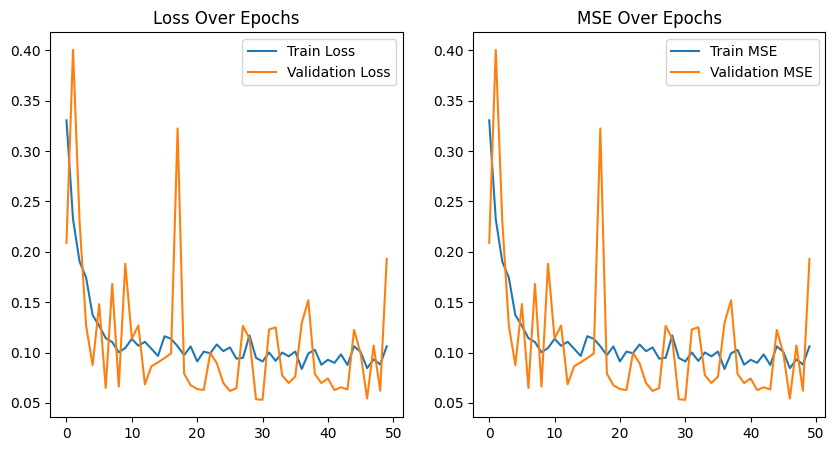

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# X_nn and y_nn are the scaled features and target respectively
X_train, X_test, y_train, y_test = train_test_split(X_nn.drop(['Date', 'StateFIPS'], axis=1), y_nn,
                                                    test_size=0.2, random_state=42)

# Print shapes of the datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

# Creating the model
tanh_model = Sequential([
    Input((X_train.shape[1],)),
    Dense(128, activation='tanh'),  # First hidden layer
    Dense(64, activation='tanh'),  # Second hidden layer
    Dense(32, activation='tanh'),  # Third hidden layer
    Dense(1)  # Output layer
])

# Compile the model
tanh_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])

# Fit the model
history = tanh_model.fit(X_train, y_train, epochs=50,
                         batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_mse = tanh_model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test MSE:", test_mse)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('MSE Over Epochs')
plt.legend()

plt.show()

Epoch 1/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1075.3219 - mse: 1075.3219 - val_loss: 0.0929 - val_mse: 0.0929
Epoch 2/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0729 - mse: 0.0729 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 3/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0880 - mse: 0.0880 - val_loss: 0.1271 - val_mse: 0.1271
Epoch 4/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0715 - mse: 0.0715 - val_loss: 0.1648 - val_mse: 0.1648
Epoch 5/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0857 - mse: 0.0857 - val_loss: 0.1264 - val_mse: 0.1264
Epoch 6/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1179 - mse: 0.1179 - val_loss: 0.1240 - val_mse: 0.1240
Epoch 7/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1091 - mse: 0.1091 - val_loss: 0.0475 - val_mse: 0.0475
Epoch 8/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1843 - mse: 0.1843 - val_loss: 0.5969 - val_mse: 0.5969
Epoch 9/50
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

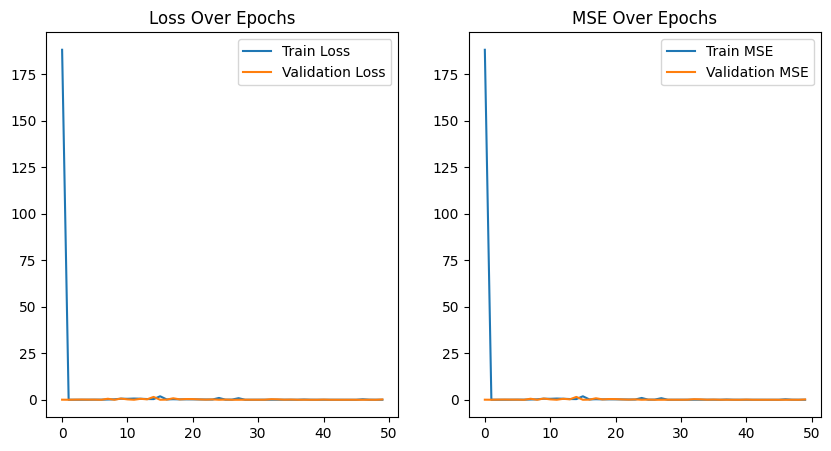

In [ ]:
# Creating the model
relu_model = Sequential([
    Input((X_train.shape[1],)),
    Dense(128, activation='relu'),  # First hidden layer
    Dense(64, activation='relu'),  # Second hidden layer
    Dense(32, activation='relu'),  # Third hidden layer
    Dense(1)  # Output layer
])

# Compile the model
relu_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='mean_squared_error', metrics=['mse'])

# Fit the model
history = relu_model.fit(X_train, y_train, epochs=50,
                    batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_mse = relu_model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test MSE:", test_mse)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('MSE Over Epochs')
plt.legend()

plt.show()

## GPU optimization (to do)

In [ ]:
!nvidia-smi

In [ ]:
import sys
!rsync -ah --progress ../input/rapids/rapids.0.14.0 /opt/conda/envs/rapids.tar.gz
!cd /opt/conda/envs/ && tar -xzvf rapids.tar.gz > /dev/null
sys.path = ["/opt/conda/envs/rapids/lib/python3.7/site-packages"] + sys.path
sys.path = ["/opt/conda/envs/rapids/lib/python3.7"] + sys.path
sys.path = ["/opt/conda/envs/rapids/lib"] + sys.path
!rsync -ah --progress /opt/conda/envs/rapids/lib/libxgboost.so /opt/conda/lib/